<a href="https://colab.research.google.com/github/SachinScaler/Nov23_MathsForML/blob/main/LA4_Loss_Minimization_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd


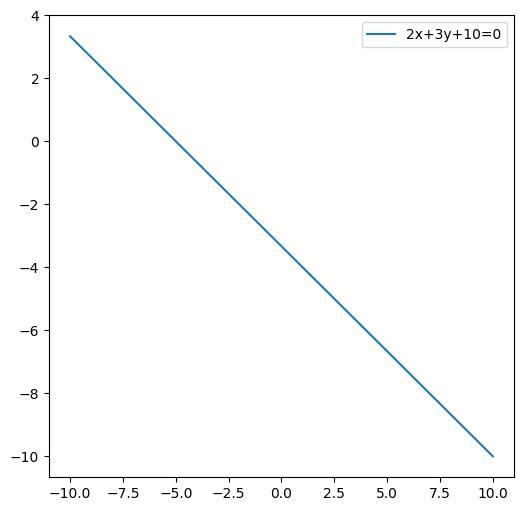

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# lets plot: 2x+3y+10=0
def plot_any_equation():
    x = np.linspace(-10,10,1000) # take 1000 numbers between -10 and -10

    # calculate y values as per the equation: 2x+3y+10=0
    y = (-2*x-10)/3 #y = (-2x-10)/3

    # plot the line using x and y
    fig, ax = plt.subplots(figsize=(6,6)) # image size
    ax.plot(x, y) # lineplot
    plt.legend(["2x+3y+10=0"]) # legend
    plt.show()

plot_any_equation()

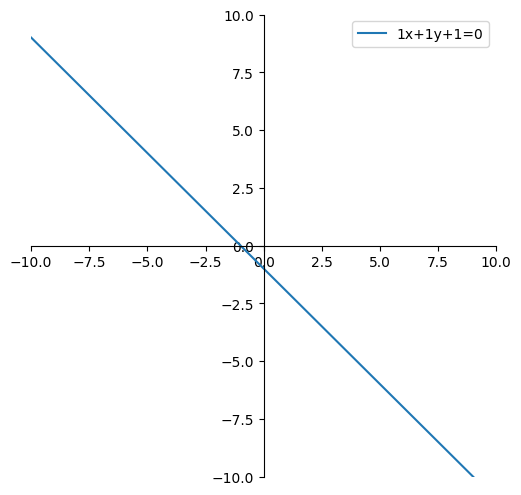

In [28]:
def plot_equation(w,w0):
    w1,w2 = w
    x = np.linspace(-10,10,1000) # take 1000 numbers between -10 and -10

    # calculate y values as per the equation: 2x+3y+10=0
    y = (-w1*x-w0)/w2 #y = (-2x-10)/3

    # plot the line using x and y
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(x, y)
    plt.legend([f"{w1}x+{w2}y+{w0}=0"])


    # beautification: set origin at 0,0
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.set_xlim(-10,10) # x axis length
    ax.set_ylim(-10,10) # y axis length
    ax.spines['top'].set_color('none') # remove outer covering lines
    ax.spines['right'].set_color('none') # remove outer covering lines


    plt.show()

w=[1,1]
w0=1
plot_equation(w,w0)

In [54]:
from sklearn import datasets

x, y = datasets.make_blobs(n_samples=200, centers=[[2, 2], [8, 8]], n_features=2, center_box=(0, 10))
x.shape, y.shape

((200, 2), (200,))

In [55]:
pd.DataFrame(x).head()

,0,1
0,2.791001,1.934958
1,0.717074,0.531046
2,1.379158,2.406297
3,1.005176,2.589218
4,0.988023,0.097934


In [56]:
y # labels

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0])

In [57]:
# wherever y=0 make it -1
y[y==0]=-1
y

array([-1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
        1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1])

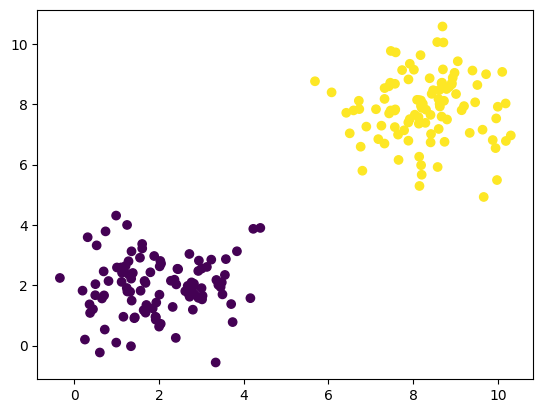

In [58]:
# x_axis values, y_axis value and color
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

### Perceptron

In [59]:
w=np.random.normal(size=(2,)) # intialzation with normal distribution
w0=np.random.normal()
print(f"W: {w}  w0:{w0}")

W: [-0.33048138  0.83942936]  w0:-0.9868856793650573


In [60]:
plot_equation(w,w0)

TypeError: ignored

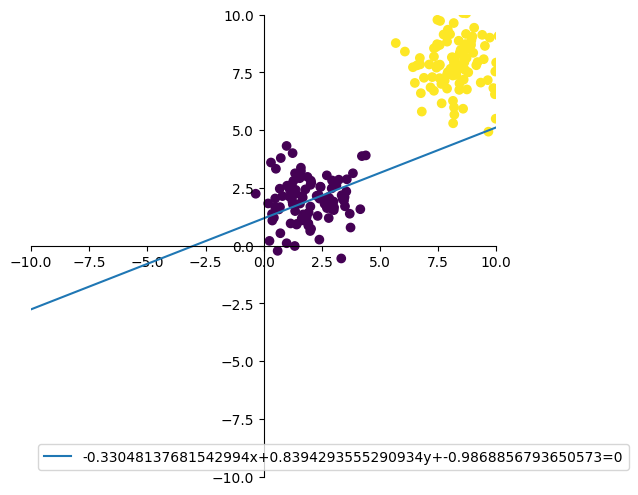

In [61]:
def plot_equation(w,w0,x,y):
    w1,w2 = w
    x_line = np.linspace(-10,10,1000) # take 1000 numbers between -10 and -10

    # calculate y values as per the equation: 2x+3y+10=0
    y_line = (-w1*x_line-w0)/w2 #y = (-2x-10)/3

    # plot the line using x and y
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(x_line, y_line)
    plt.legend([f"{w1}x+{w2}y+{w0}=0"])

    # plot scatter plot
    ax.scatter(x[:,0], x[:,1], c = y)


    # beautification: set origin at 0,0
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.set_xlim(-10,10) # x axis length
    ax.set_ylim(-10,10) # y axis length
    ax.spines['top'].set_color('none') # remove outer covering lines
    ax.spines['right'].set_color('none') # remove outer covering lines


    plt.show()

plot_equation(w,w0,x,y)

Before->    W: [-0.33048138  0.83942936]  w0:-0.9868856793650573
0


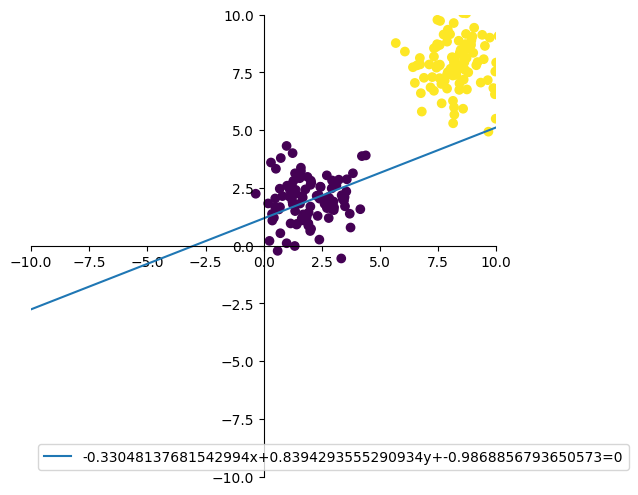

50


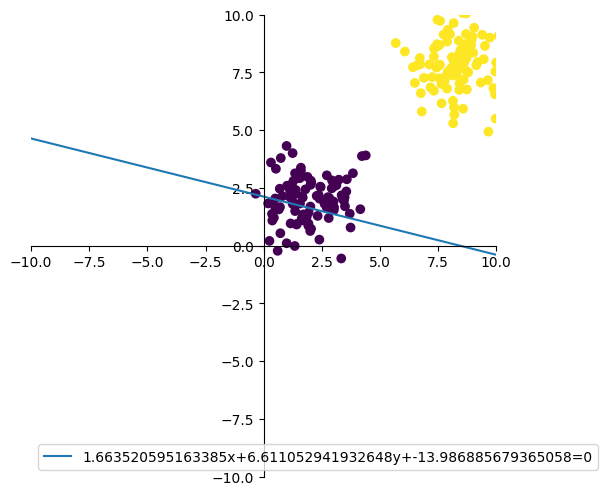

100


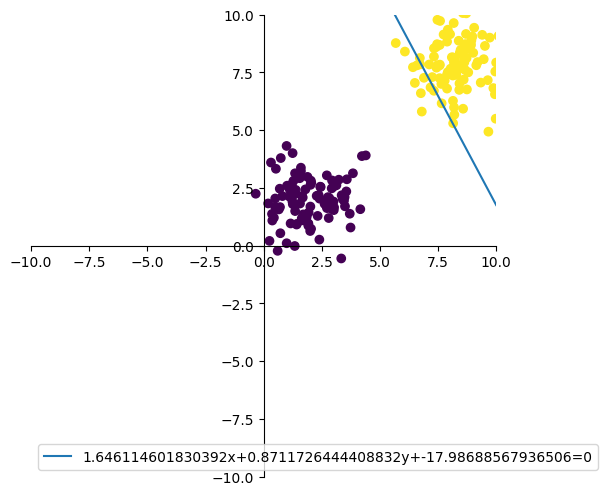

150


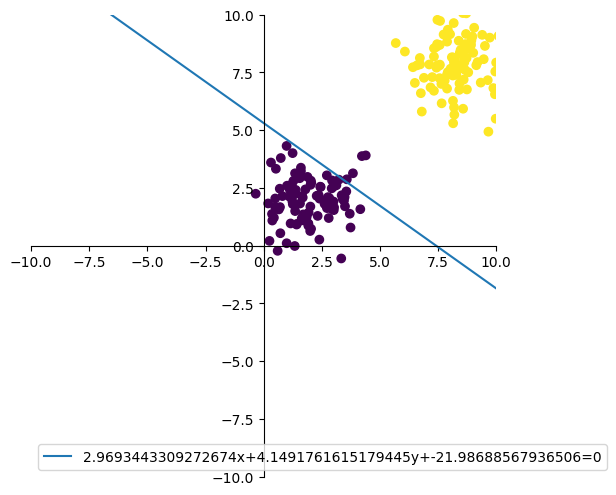

After->     W: [4.22445298 7.21727026]  w0:-23.98688567936506


In [62]:
def peceptron_onevector(x,y,w,w0):
    mis_class=0
    # loop over all points to find first misclassification
    for point in range(len(x)):

        dot_p=np.dot(w,x[point])+w0 # wt.x+wo
        hsign = np.sign(dot_p)
        if hsign != np.sign(y[point]):
            mis_class+=1
            # update step
            w= w+x[point]*np.sign(y[point]) # w = w+x*label
            w0=w0+np.sign(y[point]) # 0.01 *np.sign(y[point])

        if point%50==0:
            print(point)
            plot_equation(w,w0,x,y)


    return w,w0
print(f"Before->    W: {w}  w0:{w0}")
w,w0 = peceptron_onevector(x,y,w,w0)
print(f"After->     W: {w}  w0:{w0}")

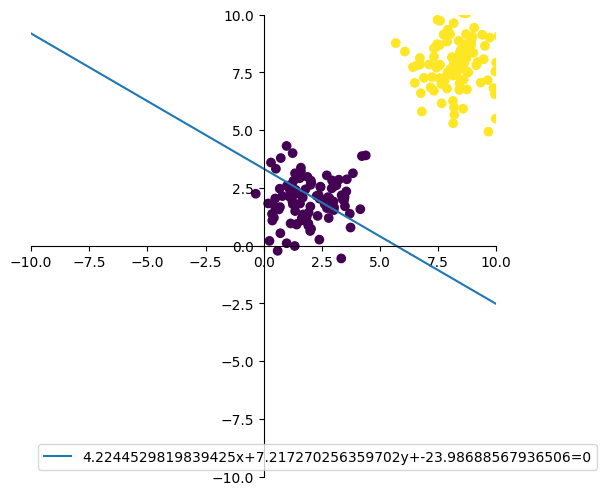

In [64]:
plot_equation(w,w0,x,y)

Before->    W: [4.22445298 7.21727026]  w0:-23.98688567936506
199


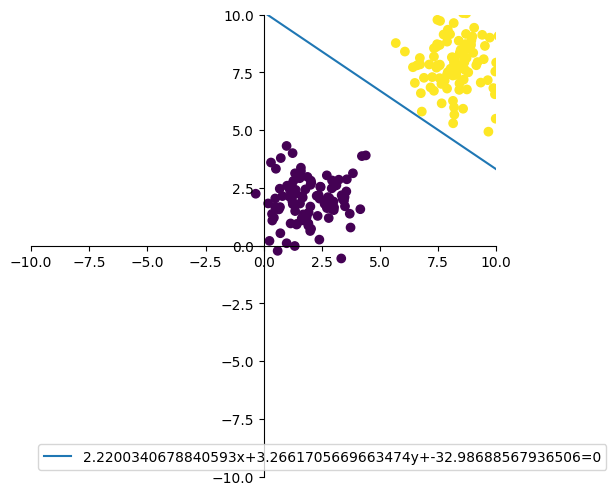

After->     W: [2.22003407 3.26617057]  w0:-32.98688567936506


In [65]:
def peceptron_onevector(x,y,w,w0,num_iterations=100):
    for iter in range(num_iterations):
        mis_class=0
        # loop over all points to find first misclassification
        for point in range(len(x)):

            dot_p=np.dot(w,x[point])+w0 # wt.x+wo
            hsign = np.sign(dot_p)
            if hsign != np.sign(y[point]):
                mis_class+=1
                # update step
                w= w+x[point]*np.sign(y[point])
                w0=w0+np.sign(y[point]) # 0.01 *np.sign(y[point])

    if num_iterations%10==0:
            print(point)
            plot_equation(w,w0,x,y)

    return w,w0
print(f"Before->    W: {w}  w0:{w0}")
w,w0 = peceptron_onevector(x,y,w,w0)
print(f"After->     W: {w}  w0:{w0}")

###

In [74]:
x, y = datasets.make_blobs(n_samples=200, centers=[[3, 1], [6, 8]], n_features=2, center_box=(4, 5),cluster_std=(2.0,2.0))

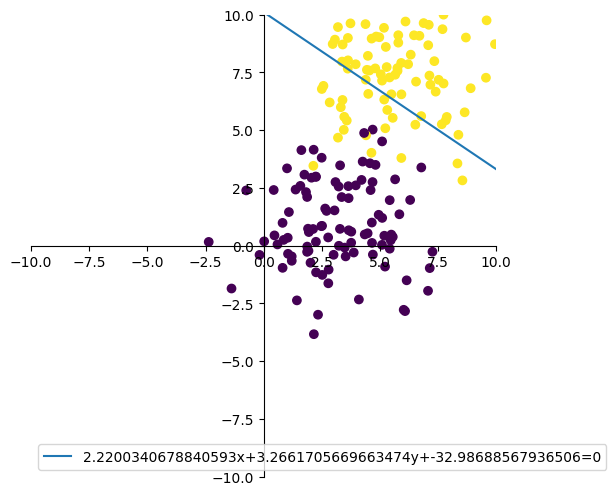

In [75]:
plot_equation(w,w0,x,y)

### Modify perceptron to stop iteration at some given thershold (95%)